# Spotify Data Analysis

## Overview

The digital music industry has seen exponential growth in recent years, with platforms like Spotify playing a pivotal role in transforming how music is consumed globally. This project aims to analyze Spotify data to uncover trends, insights, and patterns about user preferences, genre popularity, artist performance, and explicit content in music. By leveraging data visualization, we aim to address key questions, such as:

How do user preferences vary across genres and decades?
Do explicit lyrics influence the popularity of songs or artists?
What role does time play in shaping user inclination toward particular artists or genres?
This study combines time-series analysis, genre exploration, and artist-specific insights to understand the evolving nature of the music industry and user behavior. The insights derived could help music producers, artists, and marketers optimize content creation and distribution strategies.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading the CSV files into DataFrames
df1 = pd.read_csv("tracks.csv")
df = pd.read_csv("artists.csv")

<br>

### Cleaning the Data

In [3]:
# Removing the brackets to unnest the list of values from the artist_id
df1['id_artists'] = df1['id_artists'].str.replace("[", "", regex=False)
df1['id_artists'] = df1['id_artists'].str.replace("]", "", regex=False)

# Splitting the artist IDs using the delimiter ","
df1['id_artists'] = df1['id_artists'].str.split(',')

# Unnesting the list of artist IDs
df3 = df1.explode('id_artists')

# Removing single quotes from artist IDs
df3['id_artists'] = df3['id_artists'].str.replace("'", "", regex=False)

In [4]:
# Merging the two DataFrames using an inner join
spotify_data = pd.merge(df3, df, left_on='id_artists', right_on='id', how='inner')

# Renaming columns
spotify_data = spotify_data.rename(columns={"id": "track_id", "name_x": "track_name"})

In [5]:
spotify_data.columns

Index(['id_x', 'track_name', 'popularity_x', 'duration_ms', 'explicit',
       'artists', 'id_artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'id_y', 'followers', 'genres', 'name_y', 'popularity_y'],
      dtype='object')

In [6]:
# Renaming columns to make them more intuitive
spotify_data = spotify_data.rename(columns={
    "id_x": "track_id",
    "id_y": "artist_id",
    "name_y": "artist_name",
    "popularity_x": "track_popularity",
    "popularity_y": "artist_popularity",
    "duration_ms": "track_duration",
    "release_date": "track_release_date"
})

In [7]:
# Adding a new attribute: track duration in minutes
spotify_data['track_duration_mins'] = spotify_data['track_duration'] / 60000

In [8]:
# Handling inconsistent date formats in 'track_release_date'
# Adding "-01-01" to years without month and day information
spotify_data['track_release_date'] = spotify_data['track_release_date'].apply(
    lambda x: f"{x}-01-01" if len(str(x)) == 4 else x
)

In [9]:
# Converting 'track_release_date' to datetime format
spotify_data['track_release_date'] = pd.to_datetime(spotify_data['track_release_date'], errors='coerce')

# Removing rows with all missing values
spotify_data = spotify_data.dropna(how='all')

# Scaling features to the range 0–1
scaler = MinMaxScaler()

# List of features to scale based on column names
features_to_scale = ['key', 'loudness', 'tempo', 'time_signature']

# Scaling each feature
spotify_data[features_to_scale] = scaler.fit_transform(spotify_data[features_to_scale])

# Removing rows with missing 'track_release_date'
spotify_data = spotify_data[spotify_data['track_release_date'].notna()]

In [10]:
spotify_data.head()

,track_id,track_name,track_popularity,track_duration,explicit,artists,id_artists,track_release_date,danceability,energy,...,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,artist_popularity,track_duration_mins
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.151,0.127,0.425564,0.6,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,2.115050
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.148,0.655,0.414029,0.2,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0,1.636667
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.212,0.457,0.529335,1.0,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23,3.027333
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.104,0.397,0.689907,0.6,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23,2.948450
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.402,0.1580,...,0.311,0.196,0.418945,0.8,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35,2.718000


<br>

# Trend Analysis

### 1. Number of tracks on Spotify categorized year-wise

#### Visualization:

In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\1468897859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_performance['Year'] = spotify_performance['track_release_date'].dt.year


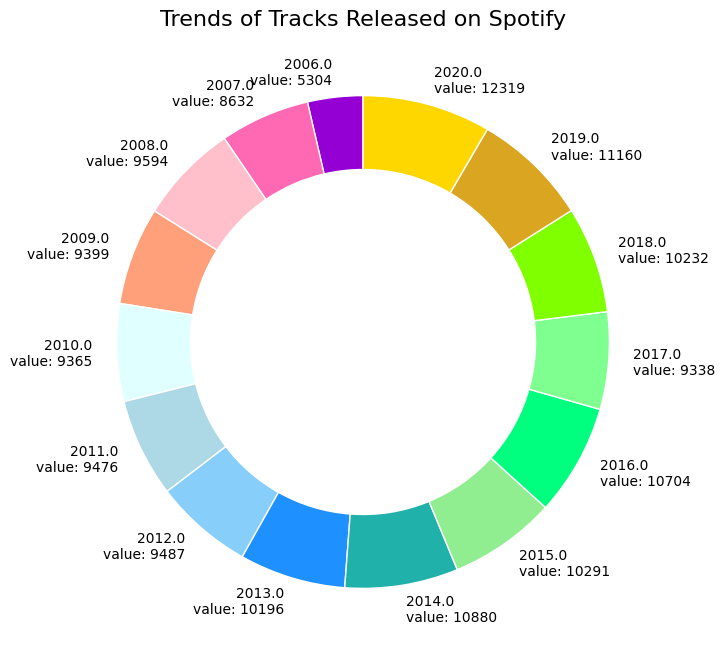

In [12]:
# Prepare the data
spotify_data['track_release_date'] = pd.to_datetime(spotify_data['track_release_date'], errors='coerce')

# Filter for tracks after 2006 and group by year
spotify_performance = spotify_data[spotify_data['track_release_date'] > pd.Timestamp("2006-01-01")]
spotify_performance['Year'] = spotify_performance['track_release_date'].dt.year

# Group by year and count the number of songs
spotify_performance = spotify_performance.groupby('Year').size().reset_index(name='no_of_songs')

# Filter out years >= 2021
spotify_performance = spotify_performance[spotify_performance['Year'] < 2021]

# Calculate percentages and positions for the donut chart
spotify_performance['fraction'] = spotify_performance['no_of_songs'] / spotify_performance['no_of_songs'].sum()
spotify_performance['ymax'] = spotify_performance['fraction'].cumsum()
spotify_performance['ymin'] = spotify_performance['ymax'].shift(fill_value=0)
spotify_performance['labelPosition'] = (spotify_performance['ymax'] + spotify_performance['ymin']) / 2

# Format labels to include only integers
spotify_performance['label'] = spotify_performance.apply(
    lambda row: f"{row['Year']}\nvalue: {int(row['no_of_songs'])}", axis=1
)

# Plot using Matplotlib
colors = [
    "#9400D3", "#FF69B4", "#FFC0CB", "#FFA07A", "#E0FFFF", "#ADD8E6", 
    "#87CEFA", "#1E90FF", "#20B2AA", "#90EE90", "#00FF7F", "#7FFF90", 
    "#7FFF00", "#DAA520", "#FFD700"
]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Create wedges for the donut chart
wedges, texts = ax.pie(
    spotify_performance['fraction'],
    labels=spotify_performance['label'],
    colors=colors[:len(spotify_performance)],
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Title
plt.title("Trends of Tracks Released on Spotify", fontsize=16)
plt.show()

The aim of this visualization is to provide a quick and simple way to see how the number of tracks released by Spotify has changed over the years, broken down by decade. By seeing the size of each slice, it should be easy to quickly compare the number of tracks released in different decades and get an overall understanding of the data. The donut chart depicts the evolution of the number of tracks released on Spotify, starting with 5304 tracks in 2006 and steadily rising to 12331 tracks in 2020. However, there was a slight decrease in the number of tracks released in 2017, which was almost a thousand less than the previous year.

The number of tracks uploaded on Spotify for each year has been consistently increasing. In 2013 we see a more than regular increase in the number of tracks being uploaded and the reason is, the prices of compact disc began to increase during the same time frame. This was combined with the growing popularity of streaming platforms. Next we saw a drop in the number of tracks uploaded for the first time in 2017. The reason for this is unclear. However, from what we know, Spotify went public in 2018 and recorded the largest ever operational costs in its history in 2017 due to worldwide expansion.

<br>

### 2. Comparing sentiments of the tracks released on Spotify before and during COVID-19

#### Hypothesis: 
Covid-19, also known as the novel coronavirus, ahighly infectious respiratory illness swept across the world, affectingmillions of people and causing widespread panic and disruption. The Covid-19 pandemic has had a profound impact on every aspect of life,from the economy and public health to the music industry. The pandemicnot only affected physical health but also had a significant impact onmental health, particularly in terms of depression. Thus, we conducted an experiment to find the type of tracks released by Spotify in theyears 2019 and 2020.

#### Aim: 
Do a comparative study for the years 2019 and 2020 inorder to find a relation between the type of songs released on Spotifyand people’s mental health.

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\2511177318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_pandemic['mood'] = spotify_pandemic['valence'].apply(lambda x: "Happy" if x > 0.5 else "Sad")
C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\2511177318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_pandemic['covid_year'] = spotify_pandemic['track_release_date'].apply(


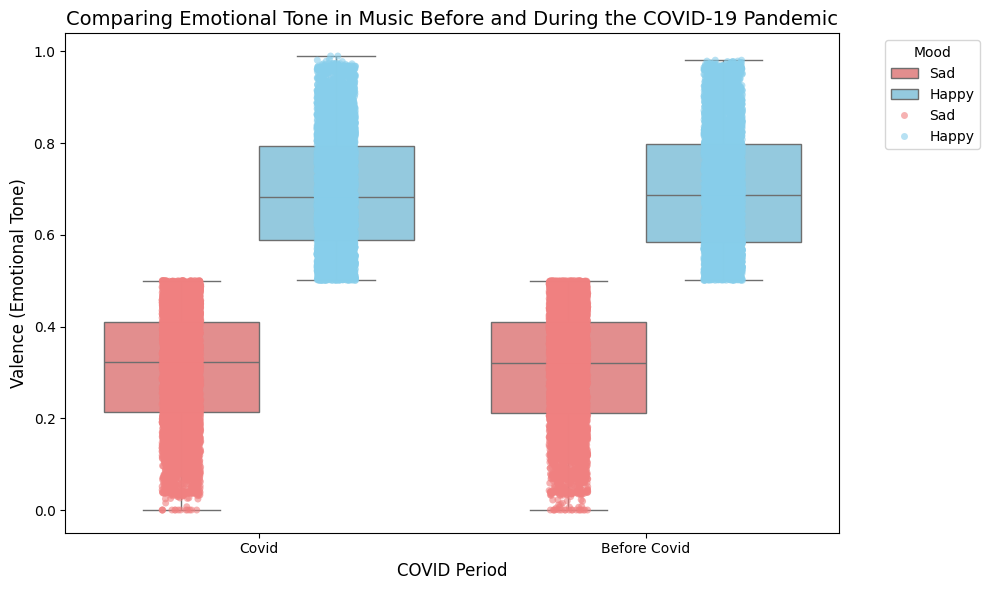

In [13]:
# Filter for tracks released between 2019 and 2020
spotify_data['track_release_date'] = pd.to_datetime(spotify_data['track_release_date'], errors='coerce')
spotify_pandemic = spotify_data[
    (spotify_data['track_release_date'] >= pd.Timestamp("2019-01-01")) &
    (spotify_data['track_release_date'] <= pd.Timestamp("2020-12-31"))
]

# Create mood categories based on track_valence
spotify_pandemic['mood'] = spotify_pandemic['valence'].apply(lambda x: "Happy" if x > 0.5 else "Sad")

# Create COVID period categories
spotify_pandemic['covid_year'] = spotify_pandemic['track_release_date'].apply(
    lambda x: "Before Covid" if x < pd.Timestamp("2020-01-01") else "Covid"
)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="covid_year", 
    y="valence", 
    hue="mood", 
    data=spotify_pandemic, 
    palette={"Happy": "skyblue", "Sad": "lightcoral"},
    showfliers=False
)
sns.stripplot(
    x="covid_year", 
    y="valence", 
    hue="mood", 
    data=spotify_pandemic, 
    palette={"Happy": "skyblue", "Sad": "lightcoral"},
    dodge=True,
    alpha=0.6,
    jitter=True
)

# Customize the plot
plt.title("Comparing Emotional Tone in Music Before and During the COVID-19 Pandemic", fontsize=14)
plt.xlabel("COVID Period", fontsize=12)
plt.ylabel("Valence (Emotional Tone)", fontsize=12)
plt.legend(title="Mood", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

### Visualization Explanation
A boxplot is used to compare the distribution of valence scores for the two time periods (2019 and 2020).
Jitter points (scatter plot) overlay the boxplot to visualize individual tracks and their emotional tone.

### What is Valence?
Valence is a measure from 0.0 to 1.0 that describes the musical positivity conveyed by a track:
High valence → Positive emotions (e.g., happy, cheerful, euphoric tracks).
Low valence → Negative emotions (e.g., sad, melancholic, angry tracks)

#### Findings and Impact
No Significant Change in Valence:

Contrary to expectations, there is no clear trend showing a shift in emotional tone during the pandemic.
Both "Before Covid" and "Covid" periods have similar distributions of valence, with a mix of happy and sad tracks.
Happy vs. Sad Tracks:

Tracks classified as "Happy" (valence > 0.5) and "Sad" (valence ≤ 0.5) are present in both years.
No dominance of either mood in the pandemic period compared to pre-pandemic.
Hypothesis Rejected:

The hypothesis that the pandemic led to more "sad" or "negative" music being released was not supported by the data.
Interpretation
While COVID-19 had profound impacts on mental health and daily life, this analysis shows no major shift in the emotional tone of tracks released on Spotify during the pandemic.
The music industry appears to have maintained a balance of positive and negative tracks, suggesting that track valence may not be directly tied to societal events like the pandemic.

<br>

### 3. What drives popularity of a track? Can we predict the trend of a track released on Spotify?

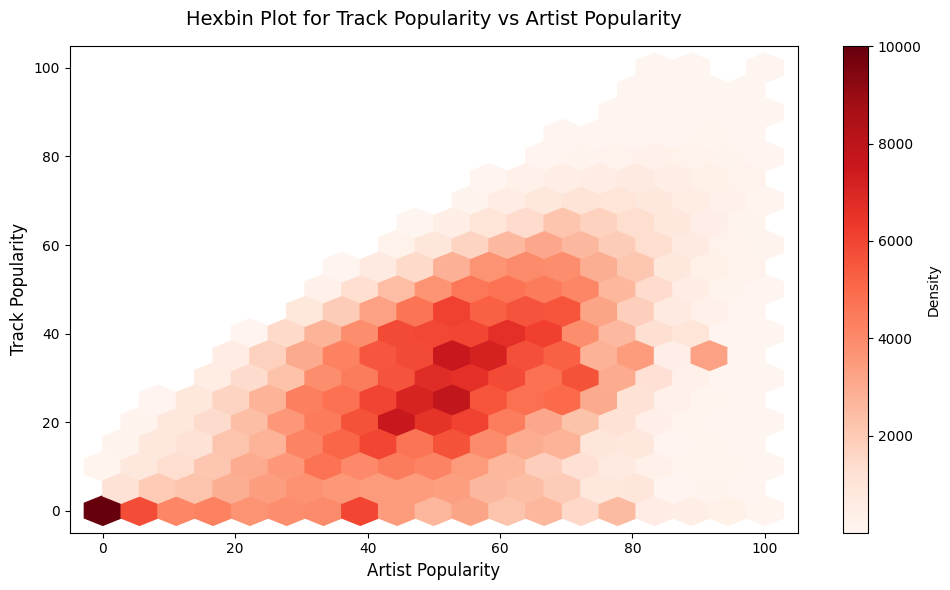

In [14]:
# Extract relevant columns and drop missing values
spotify_track_artist = spotify_data[['track_popularity', 'artist_popularity']].dropna()

# Create Hexbin Plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(
    x=spotify_track_artist['artist_popularity'],  # Artist popularity
    y=spotify_track_artist['track_popularity'],  # Track popularity
    gridsize=18, 
    cmap='Reds', 
    mincnt=1
)

# Add a color bar
cb = plt.colorbar(hb)
cb.set_label('Density')

# Labels and Title
plt.title("Hexbin Plot for Track Popularity vs Artist Popularity", fontsize=14, pad=15)
plt.xlabel("Artist Popularity", fontsize=12)
plt.ylabel("Track Popularity", fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

### Analysis
This Hex Binplot helps us in understanding the relation between the popularity of a track and the popularity of an artist. Hexbin plots take in lists of X and Y values and returns what looks somewhat similar to a scatter plot, the entire graphing space has been divided into hexagons (like a honeycomb) and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density of each hexagonal area. From this graph we undestand that highest majority of the artists have very low or negligible popularity and hence popularity of their tracks is low. At the same time, artists with high popularity have hit tracks. Thus if a new song is released on Spotify, given that the track artist is popular the track has a good chance of becoming a hit.

#### General Trend:

A positive correlation is observed: higher artist popularity tends to result in higher track popularity.
Most data points (tracks) are concentrated in regions where both artist and track popularity are low.

#### Insight:

Popular artists are more likely to release hit tracks.
Artists with low or negligible popularity tend to have tracks with low popularity.


<br>

# Feature Analysis

### 1. Relationship between features of a track

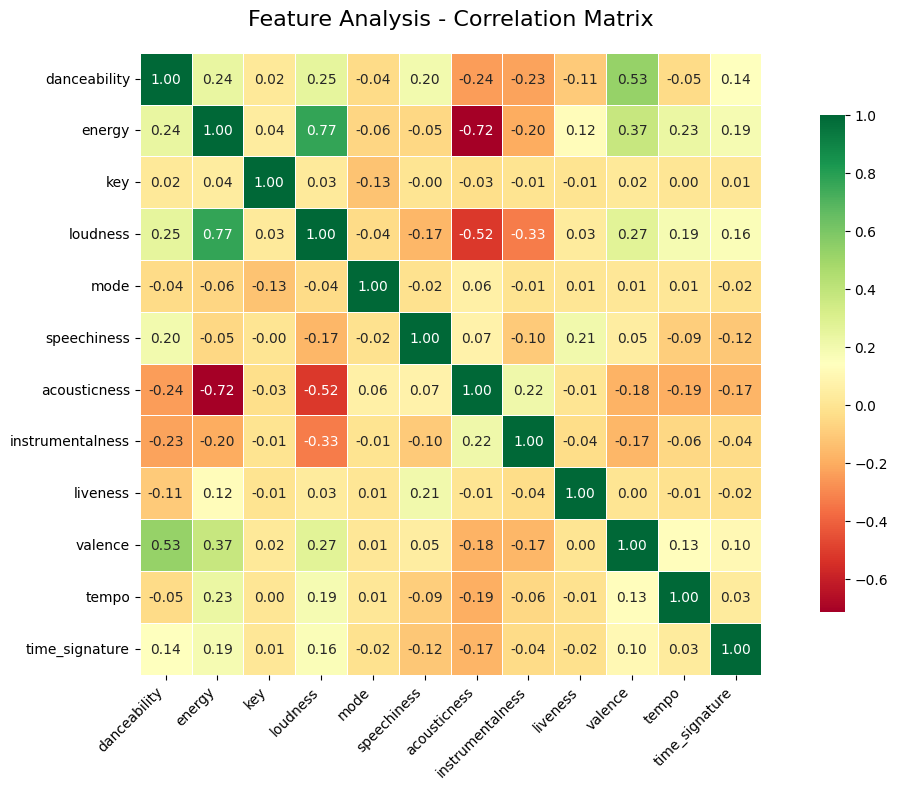

In [15]:
# Select relevant columns (track features)
df_sample = spotify_data[
    ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
     'acousticness', 'instrumentalness', 'liveness', 'valence', 
     'tempo', 'time_signature']
]

# Compute the correlation matrix
correlation_matrix = df_sample.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation values
    fmt=".2f",   # Format values to 2 decimal places
    cmap="RdYlGn",  # Colormap
    linewidths=0.5,  # Line width between cells
    square=True,  # Keep cells square-shaped
    cbar_kws={"shrink": 0.8},  # Shrink the colorbar
)

# Add title
plt.title("Feature Analysis - Correlation Matrix", fontsize=16, pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()

### Analysis from Heatmap

#### Significant Correlations:

1. Valence-Energy: Tracks with high valence (positivity) are typically energetic.
2. Valence-Danceability: Danceable tracks often convey a positive vibe.
3. Valence-Loudness: Tracks with higher loudness are more positive.
4. Energy-Loudness: High energy is directly proportional to loudness.

#### Popularity Insights:

The popularity of an artist's tracks does not strongly depend on the track features alone; other external factors like marketing, artist fame, and timing likely play a bigger role.

#### Variation in Genres:
Some genres, like "kleine hoerspie," showcase distinct feature distributions, highlighting genre-specific traits.

<br>

### Correlation Between Track Energy and Track Loudness

Analyzing the correlation between energy and loudness further.

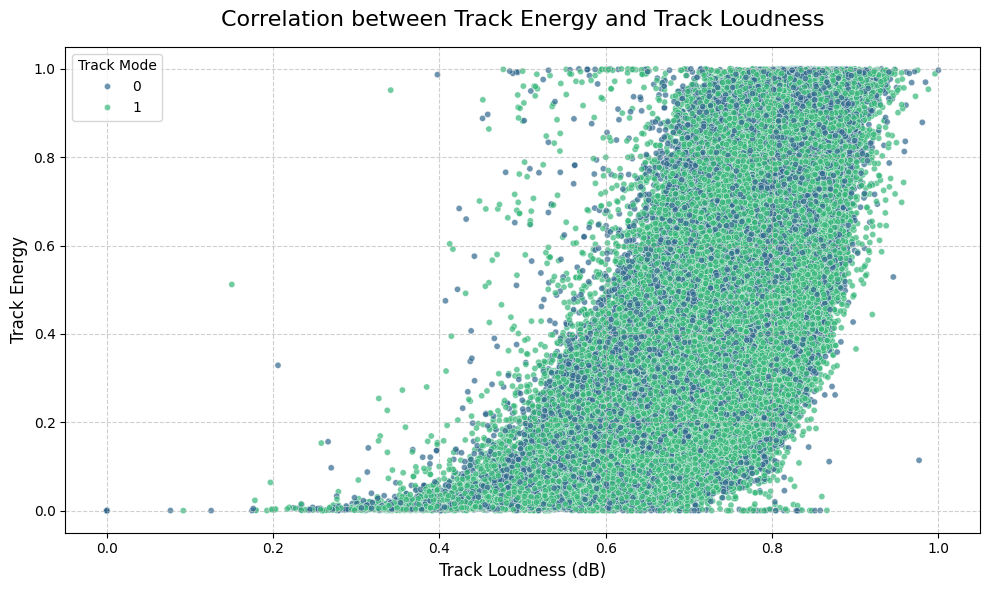

In [16]:
# Scatterplot: Track Loudness vs Energy, colored by Track Mode
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=spotify_data,
    x='loudness', 
    y='energy', 
    hue='mode',  # Color points by track mode
    palette='viridis',  # Use a visually appealing color palette
    s=20,  # Point size
    alpha=0.7,  # Transparency for overlapping points
)

# Titles and labels
plt.title("Correlation between Track Energy and Track Loudness", fontsize=16, pad=15)
plt.xlabel("Track Loudness (dB)", fontsize=12)
plt.ylabel("Track Energy", fontsize=12)
plt.legend(title="Track Mode", fontsize=10, loc='upper left')

# Adjust grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

### Analysis of Scatterplot
The plot showcases the correlation between different characteristics of the song tracks, indicating how they are related to one another. If the values are close to 1, then the features are positively correlated and are depicted in green, such as between “track_loudness” and ”track_energy.” On the other hand, if the values are close to -1, then the features are negatively correlated and are shown in red, forinstance, between “track_acousticness” and both “track_energy” and”track_loudness”

#### Positive Correlation:

As expected, track loudness and energy exhibit a positive correlation. Louder tracks often have higher energy.

#### Clustering by Mode:
The scatterplot shows distinct groupings based on track mode (major or minor). Tracks in the major mode tend to be louder and more energetic than those in the minor mode.

#### Outliers:
Some points indicate quieter tracks with unexpectedly high energy levels, warranting further investigation.

#### Musical Characteristics:
This visualization reinforces the connection between loudness and energy as defining characteristics of a track’s mood and genre.

<br>

### 2. What factors contribute to the popularity of the track of a popular artist?  


C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\688615086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['track_release_date'] = df_s['track_release_date'].astype(str)
C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\688615086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s[['Year', 'Month', 'Date']] = df_s['track_release_date'].str.split('-', expand=True)
C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\688615086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

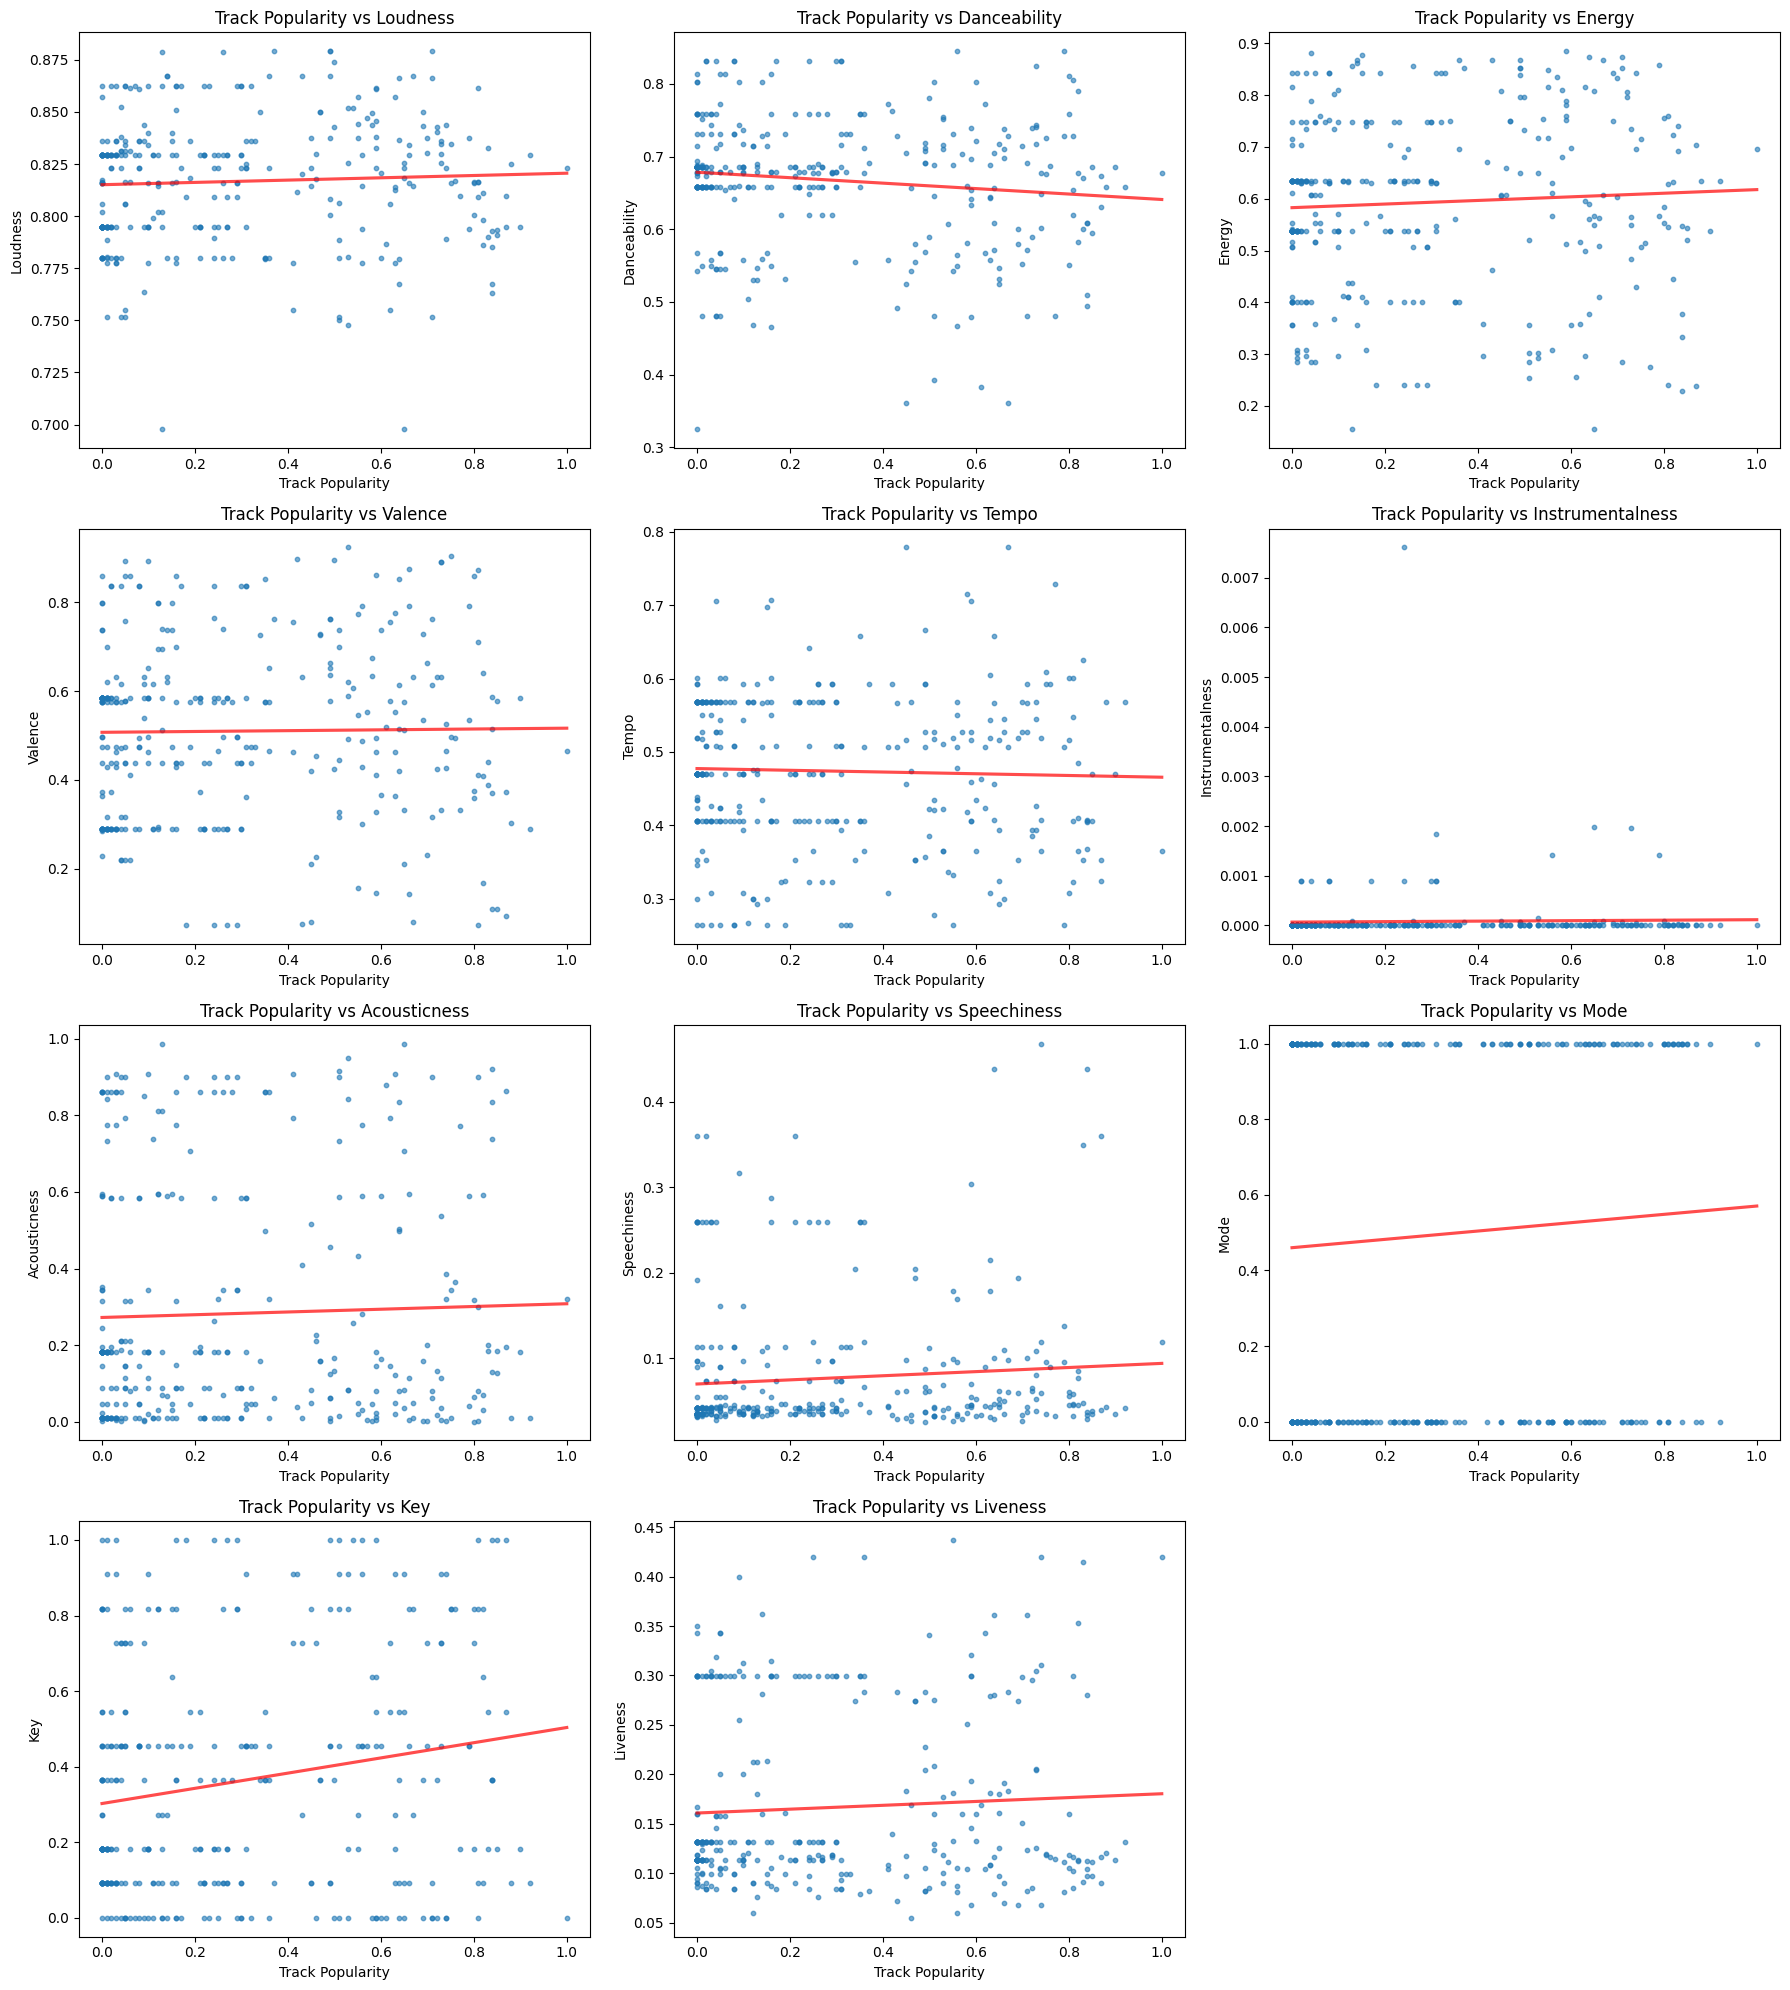

In [17]:
# Filter dataset for the artist with the highest popularity
df_s = spotify_data[spotify_data['artist_popularity'] == spotify_data['artist_popularity'].max()]

# Ensure the 'track_release_date' column is a string before splitting
df_s['track_release_date'] = df_s['track_release_date'].astype(str)

# Now split the 'track_release_date' column into 'Year', 'Month', 'Date'
df_s[['Year', 'Month', 'Date']] = df_s['track_release_date'].str.split('-', expand=True)

# Normalize track popularity to a 0-1 scale
df_s['track_popularity'] = df_s['track_popularity'] / 100

# List of features to plot
features = [
    'loudness', 'danceability', 'energy', 'valence', 
    'tempo', 'instrumentalness', 'acousticness', 'speechiness', 
    'mode', 'key', 'liveness'
]

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# Plot each feature against track popularity
for i, feature in enumerate(features):
    sns.regplot(
        ax=axes[i],
        data=df_s,
        x='track_popularity',
        y=feature,
        scatter_kws={'s': 10, 'alpha': 0.6},
        line_kws={'color': 'red', 'alpha': 0.7},
        ci=None
    )
    axes[i].set_title(f"Track Popularity vs {feature.capitalize()}", fontsize=12)
    axes[i].set_xlabel("Track Popularity", fontsize=10)
    axes[i].set_ylabel(feature.capitalize(), fontsize=10)

# Remove unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Analyzing the line graph

The line graph indicates that track characteristics do not play a significant role in determining the popularity of an artist’s tracks.

<br>

## 3. What is the occurrence rate of track names for a leading artist?

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from wordcloud import WordCloud

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\4209796541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['track_release_date'] = df_s['track_release_date'].astype(str)
C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\4209796541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s[['Year', 'Month', 'Date']] = df_s['track_release_date'].str.split('-', expand=True)


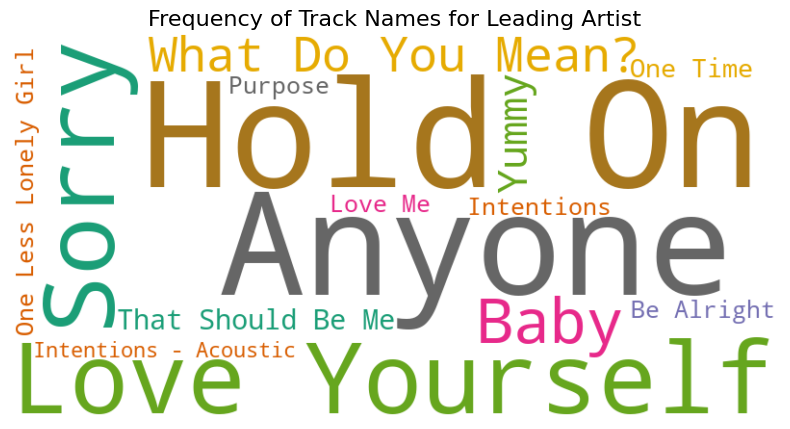

In [20]:
# # Ensure the 'track_release_date' column is a string before splitting
# df_s['track_release_date'] = df_s['track_release_date'].astype(str)
# # Step 1: Data Preprocessing (splitting track_release_date into Year, Month, Date)
# spotify_data[['Year', 'Month', 'Date']] = spotify_data['track_release_date'].str.split('-', expand=True)
# Ensure the 'track_release_date' column is a string before splitting
df_s['track_release_date'] = df_s['track_release_date'].astype(str)

# Now split the 'track_release_date' column into 'Year', 'Month', 'Date'
df_s[['Year', 'Month', 'Date']] = df_s['track_release_date'].str.split('-', expand=True)
# Filter to get the data for the most popular artist
most_popular_artist = spotify_data[spotify_data['artist_popularity'] == spotify_data['artist_popularity'].max()]

# Step 2: Calculate track name frequency
track_name_counts = most_popular_artist['track_name'].value_counts()

# Step 3: Create the word cloud
# Set up the word cloud with custom parameters
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    colormap='Dark2',  # Enhanced color palette
    min_font_size=15,  # Increase readability
    max_words=100,  # Limit the number of words shown
    random_state=1234
).generate_from_frequencies(track_name_counts.to_dict())

# Step 4: Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Frequency of Track Names for Leading Artist', fontsize=16)
plt.show()

The wordcloud visualization indicates that the track titles “hold_on” and “anyone” appear frequently for the artist Justin Bieber. The fontsize in the wordcloud allows us to determine which track titles occurmost frequently and which do not. Hence, the wordcloud visual providesinformation about the occurrence rate of track names for a leadingartist.

<br>

## 4. What variation in track characteristics can be observed across the top 10 music genres?

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\4171095430.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


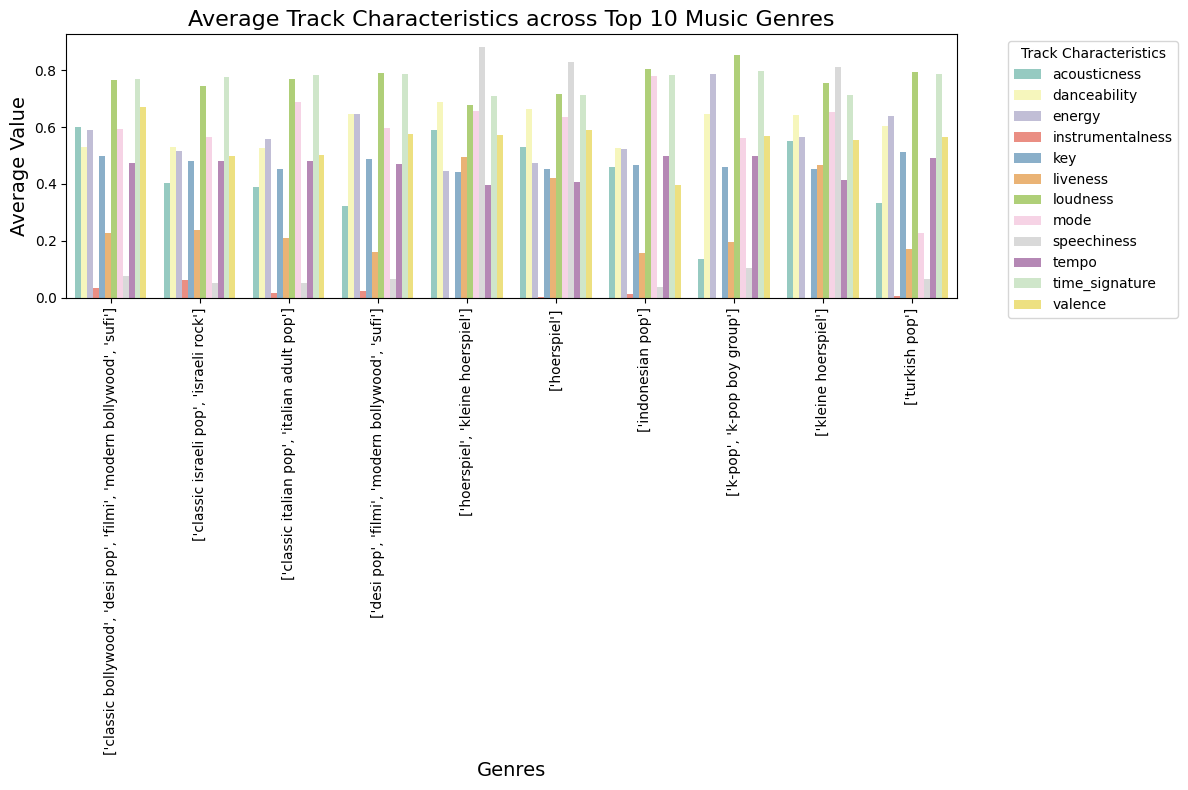

In [21]:
# Filter out rows where 'genres' is empty
spotify_data_filtered = spotify_data[spotify_data['genres'] != '[]']

# Group by genres and calculate the sum of popularity for each genre
genre_data = spotify_data_filtered.groupby('genres').agg(
    sum_popularity=('track_popularity', 'sum')
).reset_index()

# Get top 10 genres based on sum of track popularity
top_genres = genre_data.nlargest(10, 'sum_popularity')

# Filter the original data to include only these top 10 genres
df_sample = spotify_data_filtered[spotify_data_filtered['genres'].isin(top_genres['genres'])]

# Select relevant features for analysis
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]
df_sample = df_sample[features + ['genres']]

# Melt the DataFrame to create a long format for better plotting
long_df = pd.melt(df_sample, id_vars='genres', var_name='Track_Characteristic', value_name='Value')

# Calculate the average of each track characteristic for each genre
grouped_df = long_df.groupby(['genres', 'Track_Characteristic']).agg({'Value': 'mean'}).reset_index()

# Plotting the stacked bar chart using seaborn and matplotlib
# plt.figure(figsize=(12, 8))
# sns.barplot(
#     x='genres', y='Value', hue='Track_Characteristic', data=grouped_df,
#     ci=None, palette='Set3'
# )
# plt.title('Average Track Characteristics across Top 10 Music Genres', fontsize=16)
# plt.xlabel('Genres', fontsize=14)
# plt.ylabel('Average Value', fontsize=14)
# plt.xticks(rotation=90)
# plt.tight_layout()

# # Show the plot
# plt.show()

# Plotting the stacked bar chart using seaborn and matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(
    x='genres', y='Value', hue='Track_Characteristic', data=grouped_df,
    ci=None, palette='Set3'
)
plt.title('Average Track Characteristics across Top 10 Music Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(
    title='Track Characteristics',
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10
)

plt.tight_layout()

# Show the plot
plt.show()

### Analyzing the Stacked Bar Chart

According to the Stacked bar chart, it can be noted that the “kleinehoerspie” genre possesses the highest values for several track features,including “track_danceability,” “track_energy,” “track_key,””track_loudness,” “track_mode,” “track_speechiness,” and”track_acousticness.” This allows us to observe the variations in eachtrack characteristic among the top 10 music genres.

<br>

# Time Series Analysis

### 1. What is the inclination of Spotify users towards particular artists, and does the year of release play a role in shaping these preferences?

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\83245070.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top5_artist = df_filtered_1.groupby('track_release_decade').apply(


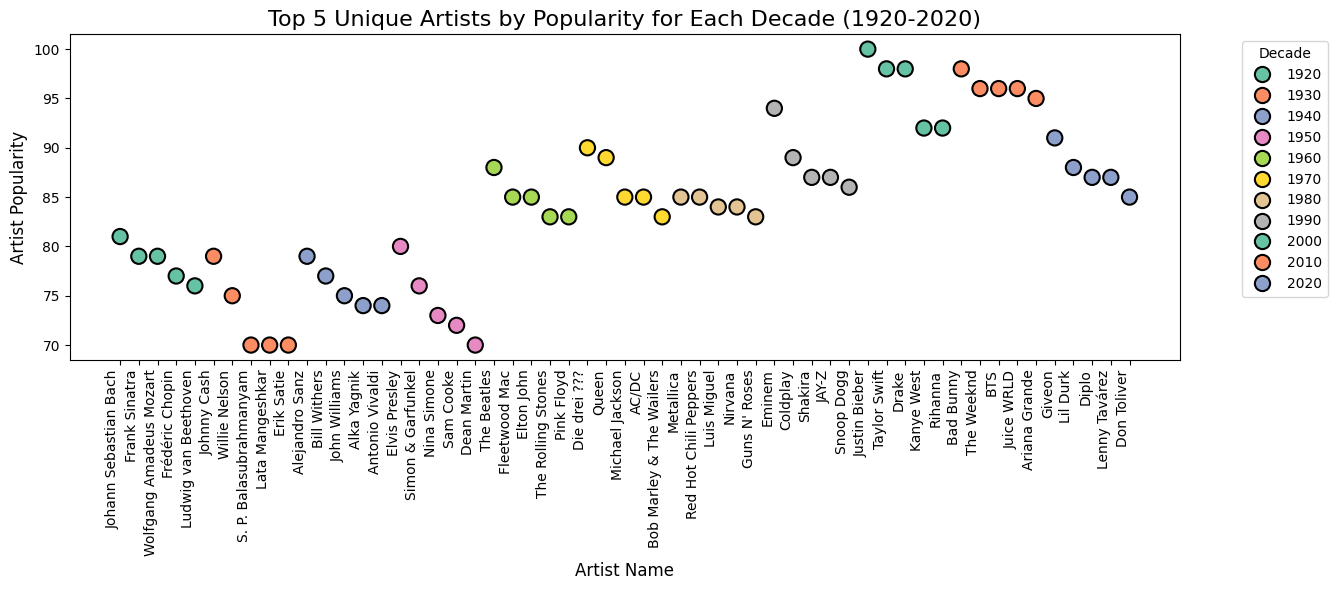

In [22]:

# Extract the year from 'track_release_date'
spotify_data['track_release_year'] = pd.to_datetime(spotify_data['track_release_date']).dt.year

# Create a column for the decade of release
spotify_data['track_release_decade'] = (spotify_data['track_release_year'] // 10) * 10

# Filter out invalid decades and missing data
spotify_data_grouped = spotify_data.dropna(subset=['track_release_decade'])
spotify_data_grouped = spotify_data_grouped[spotify_data_grouped['track_release_decade'] != 1900]

# Get top 5 artists by popularity for each decade
df_filtered_1 = spotify_data_grouped.drop_duplicates(subset=['artist_name'])
df_top5_artist = df_filtered_1.groupby('track_release_decade').apply(
    lambda x: x.nlargest(5, 'artist_popularity')
).reset_index(drop=True)

# Plot the dot plot for top 5 artists by decade
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='artist_name', y='artist_popularity', hue='track_release_decade',
    data=df_top5_artist, palette='Set2', s=120, edgecolor='black', linewidth=1.5
)
plt.title('Top 5 Unique Artists by Popularity for Each Decade (1920-2020)', fontsize=16)
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Artist Popularity', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()

# Move the legend outside the plot for better readability
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Analyzing the Plot

We plot the top 5 artists in each decade between 1920–2020. This plot also shows an increase in popularity for artists in more recent yearscompared to those in the early ones.This could be due to a few differentfactors such as the evolution of the music industry in terms of genrepreferences, better technology used to create music, globalization ofpopular genres, etc.

<br>

### 2. What is the inclination of Spotify users towards different genres of music? Does the decade that this genre originatedhave an impact on whether people still listen to it?

C:\Users\tmurt\AppData\Local\Temp\ipykernel_9708\2813246674.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres = genre_data_grouped.groupby('track_release_decade').apply(


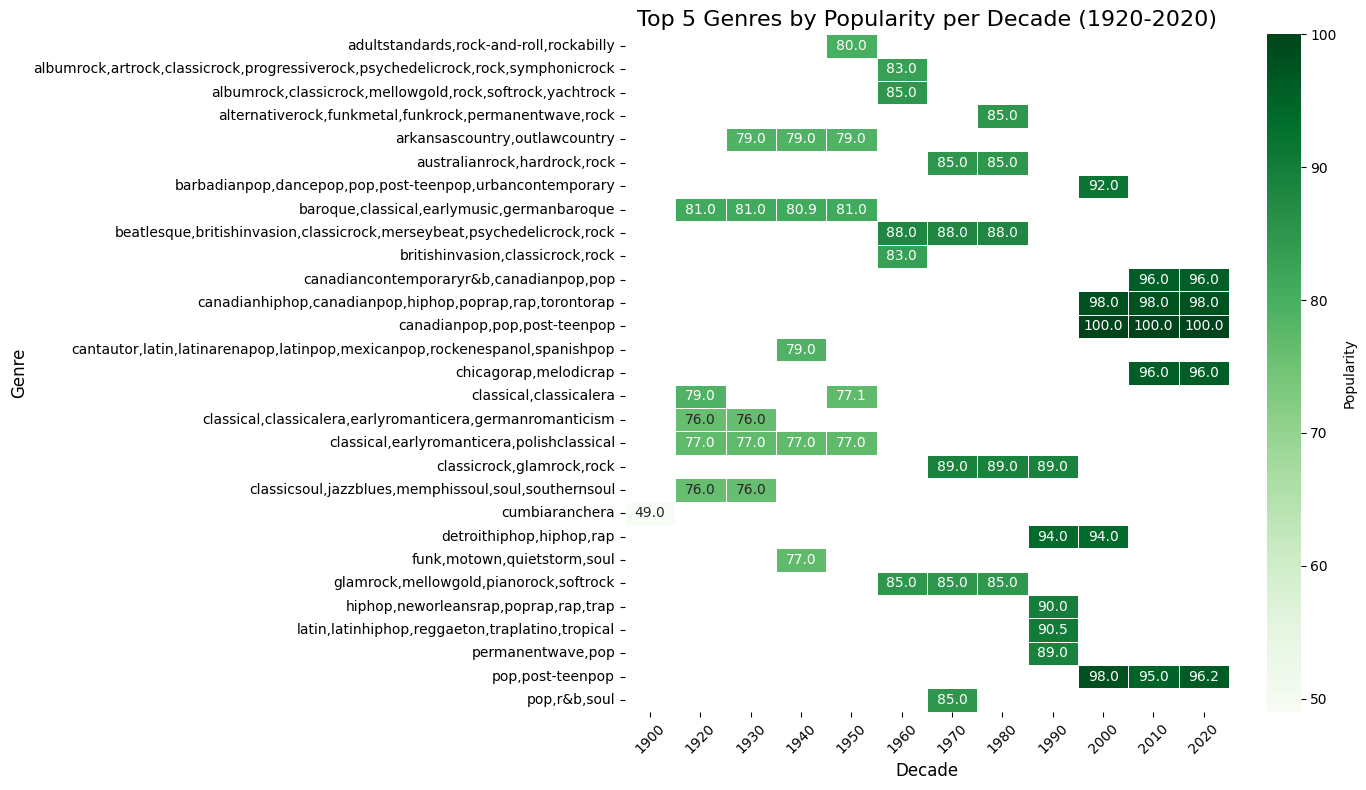

In [23]:
# Clean genre data by splitting multiple genres per track
genre_data = spotify_data.dropna(subset=['genres'])  # Remove rows where genre data is missing
genre_data['genres'] = genre_data['genres'].str.replace(r"[\[\]\'\s]", '', regex=True)  # Clean genre formatting
genre_data = genre_data.explode('genres')  # Separate rows for each genre

# Remove empty strings
genre_data = genre_data[genre_data['genres'] != '']

# Extract the release year and decade
genre_data['track_release_year'] = pd.to_datetime(genre_data['track_release_date']).dt.year
genre_data['track_release_decade'] = (genre_data['track_release_year'] // 10) * 10

# Group by decade and genre, then calculate the average popularity of each genre
genre_data_grouped = genre_data.groupby(['track_release_decade', 'genres'])['artist_popularity'].mean().reset_index()

# For each decade, get the top 5 genres by popularity
top_genres = genre_data_grouped.groupby('track_release_decade').apply(
    lambda x: x.nlargest(5, 'artist_popularity')
).reset_index(drop=True)

# Create a pivot table for better visualization (fixed argument passing)
pivot_data = top_genres.pivot(index='genres', columns='track_release_decade', values='artist_popularity')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, cmap='Greens', cbar_kws={'label': 'Popularity'},
            fmt='.1f', linewidths=0.5, annot_kws={"size": 10})

plt.title('Top 5 Genres by Popularity per Decade (1920-2020)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyzing the Plot

We plot the top 5 genres by popularity that originated in each decade between 1920–2020. What is interesting to note is that the most popular genres of all time on Spotify are those that originated in the 2000s. From the previous plot, we saw that artists of older decades didnot fare well in terms of popularity, but the same trend does not applyto genres. This shows that artists of recent years have adapted older genres into their style of music to make it more appealing to the audience.

## 3. What is the popular attitude towards explicit contentin music?

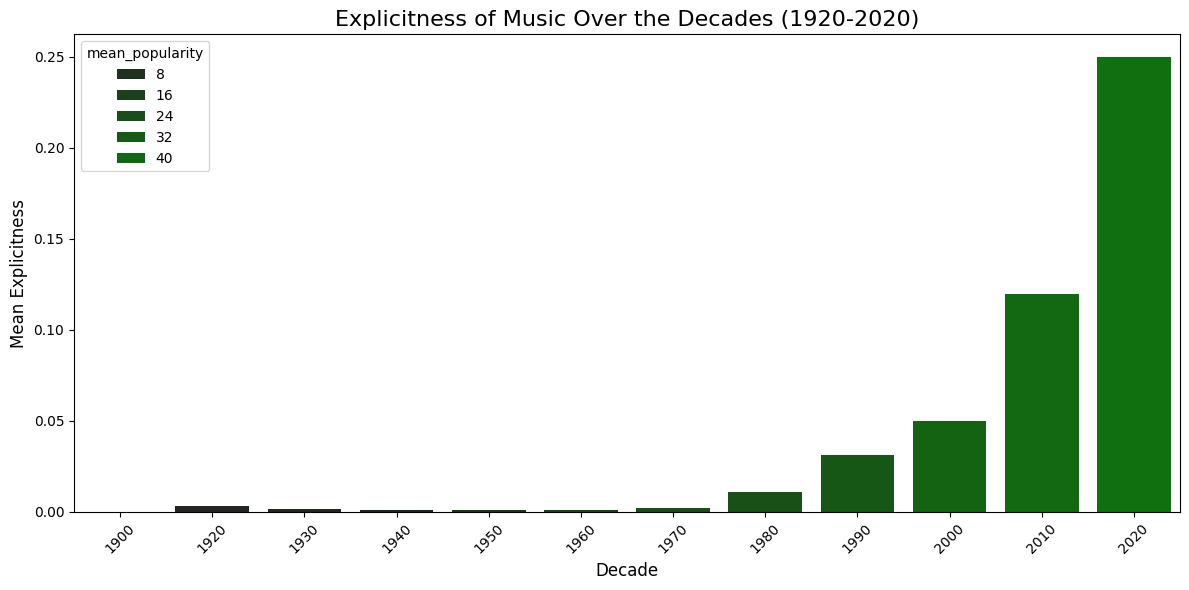

In [24]:
# Extract the release year and decade
spotify_data['track_release_year'] = pd.to_datetime(spotify_data['track_release_date']).dt.year
spotify_data['track_release_decade'] = (spotify_data['track_release_year'] // 10) * 10

# Group by track_release_decade and calculate the mean popularity and mean explicitness
grouped_data = spotify_data.groupby('track_release_decade').agg(
    mean_popularity=('track_popularity', 'mean'),
    mean_explicit=('explicit', 'mean')
).reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='track_release_decade', y='mean_explicit', 
            hue='mean_popularity', palette='dark:green', dodge=False)

plt.title('Explicitness of Music Over the Decades (1920-2020)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Mean Explicitness', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyzing the explictness of music with time

To understand this better, we plot the mean for explicitness over thedecades from 1920–2020. The mean in this case would represent theproportion of 1s (explicit) in the data set. So, for a given decade, ifthe mean of the explicitness variable is 0.6, this would mean that 60%of the tracks in the data set for that decade are explicit. Byaggregating the mean explicitness per decade, we can see how theproportion of explicit tracks has changed over time and whether thereare any trends or shifts in attitudes towards explicit content.Thisshows us that the cultural attitude towards explicit music and anartist’s freedom of expression has increased largely, with most popularsongs in the recent decades of the 2000s having popular tracks with explicit lyrics.

<br>